<a href="https://colab.research.google.com/github/hansonnguy/MAT-421/blob/main/Module_G_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 5 - Hanson Nguyen

# **21.4 Simpson's Rule**


---

Simpson's rule uses a polynomial fit over 3 $\{x_{i-1}, x_i, x_{i+1}\}$ consective points and does an exact integral over the two subintervales formed by those points $[x_{i-1}, x_i] and [x_i, x_{i+1}]$. The polynomial used is the Lagrange polynomial introduced in the interpolation lessons. The Lagrange polynomial is $P_i(x)=\frac{f(x_{i−1})}{2h^2}(x−x_i)(x−x_{i+1})−\frac{f(x_i)}{h^2}(x−x{i−1})(x−x_{i+1})+\frac{f(x{i+1})}{2h^2}(x−x_{i−1})(x−x_i)$, which can be directly integrated as $\int^{x_{i+1}}_{x_{i−1}}P_i(x)dx=\frac{h}{3}(f(x_{i−1})+4f(x_i)+f(x_{i+1})$. The total integral thus is approximated as $\int^b_af(x)dx≈\frac{h}{3}[f(x_0)+4(\sum_{i=1,i odd}^{n−1}f(x_i))+2(\sum_{i=2,i even}^{n−2}f(x_i))+f(x_n)]$. It in important to note that Simpson's rule requires an even numer of intervals, and thus an odd number of grid points.

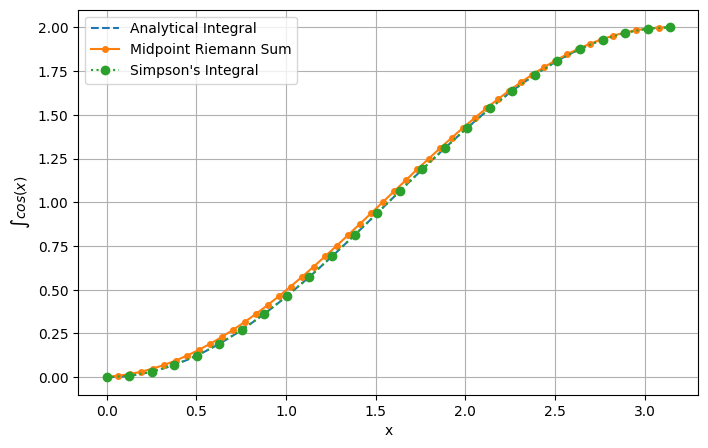

In [9]:
# Here, we can compare  Simpson's rule to Riemann sums and the analytical solution

import numpy as np
import matplotlib.pyplot as plt



def f(x):
    return np.sin(x)

# Midpoint Riemann Sum
def midpoint_riemann_sum(f, a, b, n):
    h = (b - a) / n
    x_midpoints = np.linspace(a + h/2, b-h/2, n)
    return np.cumsum(f(x_midpoints)*h)

# Simpson integral
def simpson(f, a, b, n):
    # Ensure an odd number of points for Simpson's rule
    if n % 2 == 0:
        n += 1
    x = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    y = f(x)
    x_even = x[::2]
    m = len(x_even)
    I_simp = np.zeros(m)

    # use simpson's for each even point
    for k in range(1, m):
        idx = 2 * k
        even_sum = np.sum(y[2:idx:2]) if idx > 2 else 0
        odd_sum = np.sum(y[1:idx:2])
        I_simp[k] = (h / 3) * (y[0] + y[idx] + 2 * even_sum + 4 * odd_sum)

    return I_simp, x_even



a, b = 0, np.pi
n = 50

x = np.linspace(a, b, n)
riemann_integral = midpoint_riemann_sum(f, a, b, n)

simpson_integral, x_simpson = simpson(f, a, b, n)

analytical_integral = lambda x: -np.cos(x) + 1 # shift +1 to match analytical solution
y_analytical = analytical_integral(x)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(x, y_analytical, label="Analytical Integral", linestyle="dashed")
plt.plot(x, riemann_integral, label="Midpoint Riemann Sum", marker="o", markersize=4)
plt.plot(x_simpson, simpson_integral, label="Simpson's Integral", marker="o", linestyle="dotted")
plt.xlabel("x")
plt.ylabel("$\int{cos(x)}$")
plt.legend()
plt.grid()
plt.show()


# **20.5 Computing Integrals in Python**


---
Many of these methods have functions built into scipy. For instance, we can use *integrate.cumulative_trapezoid* to obtain an integral function and *integrate.quad* uses a different method for integration for direct integration.

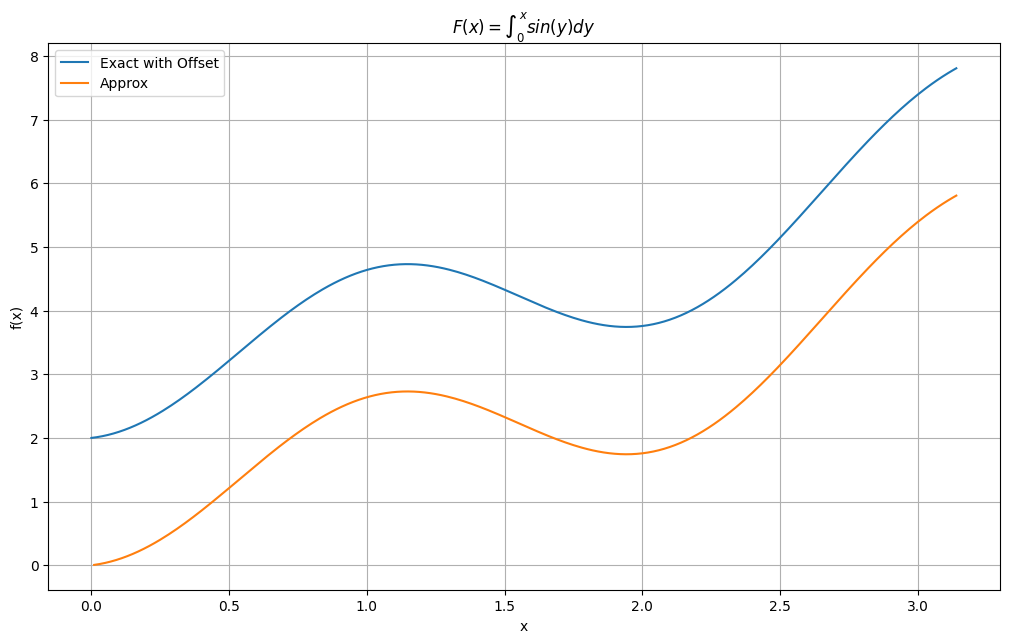

In [31]:
from scipy.integrate import cumulative_trapezoid
import matplotlib.pyplot as plt

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(3*x)+np.exp(0.5*x) + 2
F_approx = cumulative_trapezoid(3*np.sin(3*x)+0.5*np.exp(0.5*x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f(x):
    return np.sin(x)
a, b = 0, np.pi
x = np.linspace(a, b, 100)
y_analytical = -np.cos(x) + 1

quad_total, quad_err = quad(f, a, b)  # using quad from scipy.integrate, we expect a result of 2

print("Total Integral (quad):", quad_total)
print("Error (quad):", quad_err)

Total Integral (quad): 2.0
Error (quad): 2.220446049250313e-14
